<a href="https://colab.research.google.com/github/Shrez7961/Assesment/blob/main/Shaadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as  pd 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

from datetime import *
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 

# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shaadi.com/Dataset.csv')
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10-04-1986,09-06-1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,01-05-1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,01-12-1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,06-10-1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,04-10-1987,10/19/1985,1,1,486,240,1,1,0


In [3]:
dftest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shaadi.com/Dataset_test.csv')
dftest.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11-07-1985,04-11-1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,07-09-1984,05-04-1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,06-03-1987,07-01-1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12-03-1993,1,1,527,281,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101180 entries, 0 to 101179
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   101180 non-null  int64  
 1   F1      101180 non-null  float64
 2   F2      101180 non-null  float64
 3   F3      101180 non-null  float64
 4   F4      101180 non-null  float64
 5   F5      101180 non-null  int64  
 6   F6      101180 non-null  int64  
 7   F7      101180 non-null  int64  
 8   F8      101180 non-null  int64  
 9   F9      101180 non-null  int64  
 10  F10     101180 non-null  int64  
 11  F11     101180 non-null  int64  
 12  F12     101180 non-null  int64  
 13  F13     101180 non-null  int64  
 14  F14     101180 non-null  int64  
 15  F15     101180 non-null  object 
 16  F16     101180 non-null  object 
 17  F17     101180 non-null  int64  
 18  F18     101180 non-null  int64  
 19  F19     101180 non-null  int64  
 20  F20     101180 non-null  int64  
 21  F21     10

There is no null values in dataset


In [5]:
df.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,50590.500000,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,29208.294456,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,1.000000,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25295.750000,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,50590.500000,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,75885.250000,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


# **Exploratory Data Analysis...**

Univariate Plots: lets check indiviual feature behaviour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba88524950>,
      dtype=object)

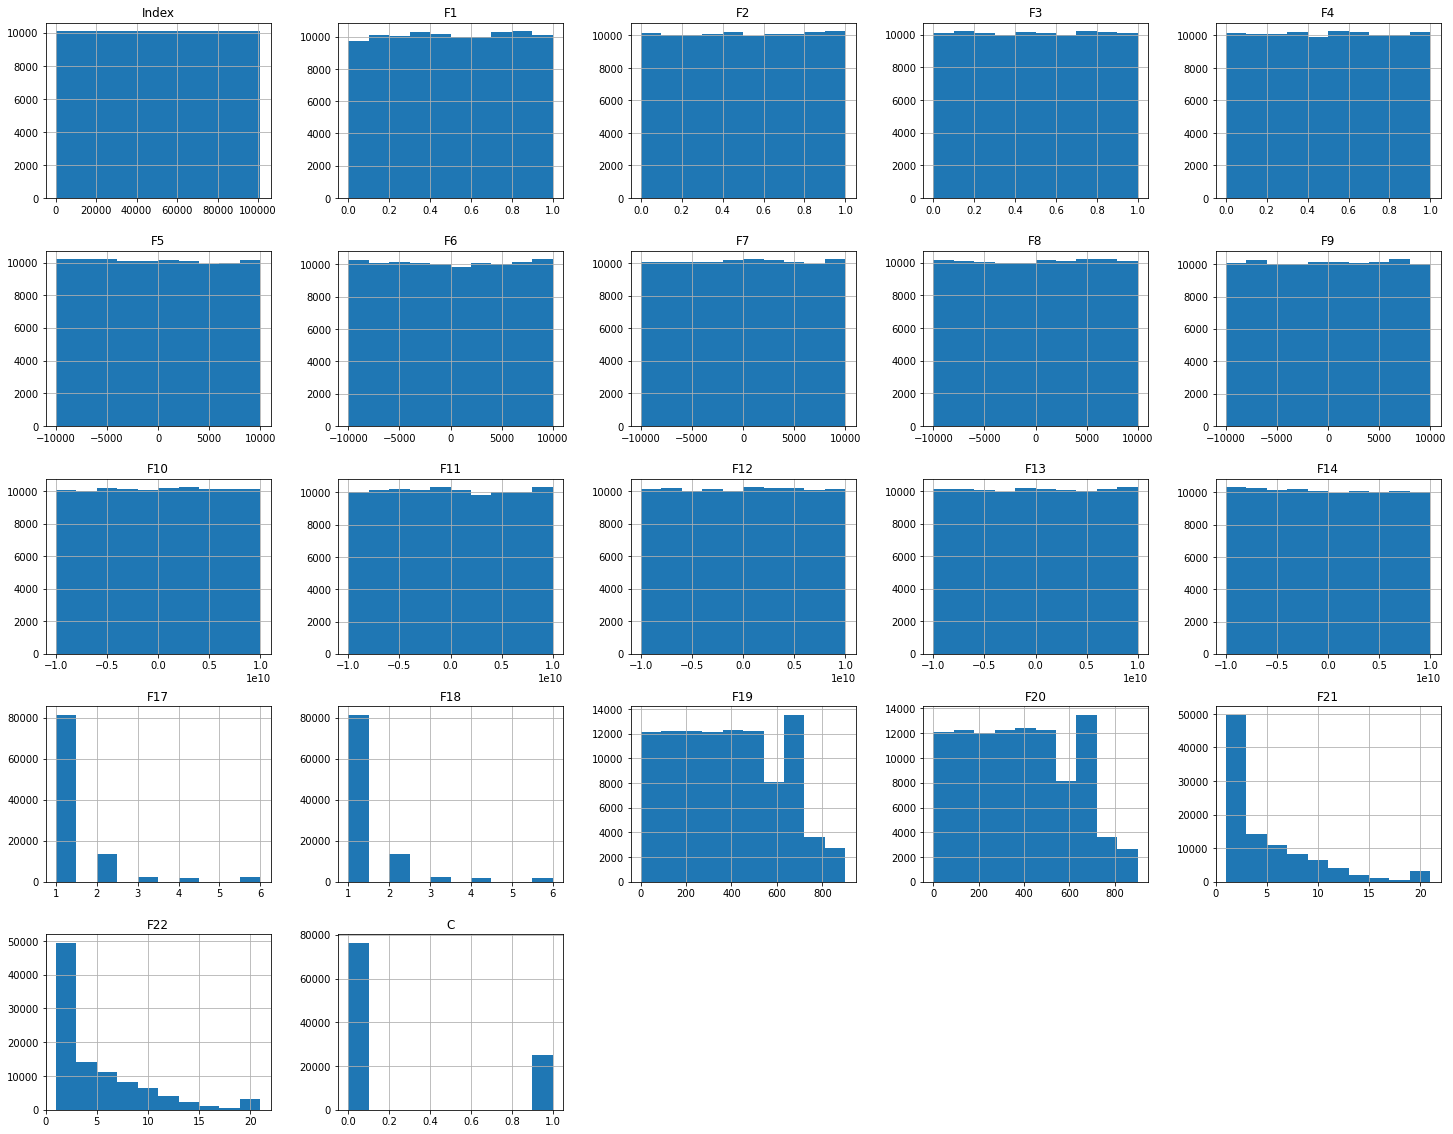

In [6]:
#checking individual pattern of features
fig = plt.figure(figsize = (25,20))
ax = fig.gca()
df.hist( ax = ax)


In [7]:
df['F14'][:15]

0    -3433637453
1      609277486
2    -8977995005
3     4868760308
4     9757408267
5    -6662571037
6    -7236244398
7    -6408783500
8     1802050857
9    -9215966088
10   -7562842865
11   -1170915872
12    8383637633
13   -2036339000
14    -498089531
Name: F14, dtype: int64

Columns F15 and F16 seems to be date of birth so we have to convert it to age considering the todays date as date of transaction

In [8]:
def age(born):
    try:
      born = datetime.strptime(born, "%d-%m-%Y").date()
      today = date.today()
      return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
    except:
      born = datetime.strptime(born, "%m/%d/%Y").date()
      today = date.today()
      return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Age1'] = df['F15'].apply(age)
df['Age2'] = df['F16'].apply(age)
  


In [9]:
df[['F15','Age1']]

,F15,Age1
0,10-04-1986,36
1,2/24/1979,43
2,01-12-1989,32
3,2/18/1982,40
4,04-10-1987,34
...,...,...
101175,11-05-1983,39
101176,7/21/1990,32
101177,01-12-1988,33
101178,11/24/1979,42


In [10]:
df[['F16','Age2']]

,F16,Age2
0,09-06-1992,30
1,01-05-1983,39
2,11/22/1986,35
3,06-10-1992,29
4,10/19/1985,36
...,...,...
101175,1/14/1993,29
101176,5/27/1994,28
101177,07-12-1993,28
101178,6/13/1987,35


As we have converted date variable with age, we must delete the F15 and F16 columns to eliminate collinearity. 

Also we do not need index  to predict C so we can drop index too 

In [11]:
df = df.drop(['Index','F15','F16'],axis = 1)
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F17,F18,F19,F20,F21,F22,C,Age1,Age2
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,-3433637453,2,1,706,305,1,2,0,36,30
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,...,609277486,1,1,423,206,18,7,1,43,39
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-8977995005,2,1,703,315,1,4,0,32,35
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,4868760308,1,1,122,304,15,1,0,40,29
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,9757408267,1,1,486,240,1,1,0,34,36


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


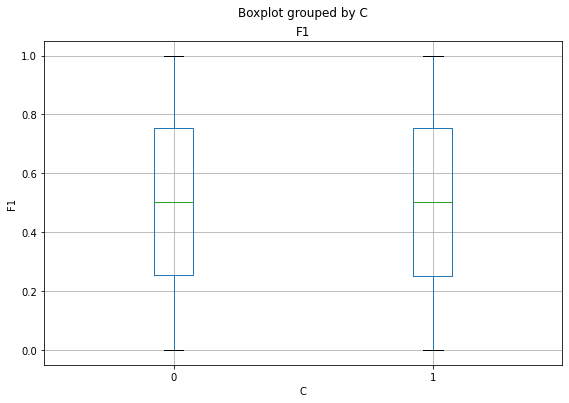

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


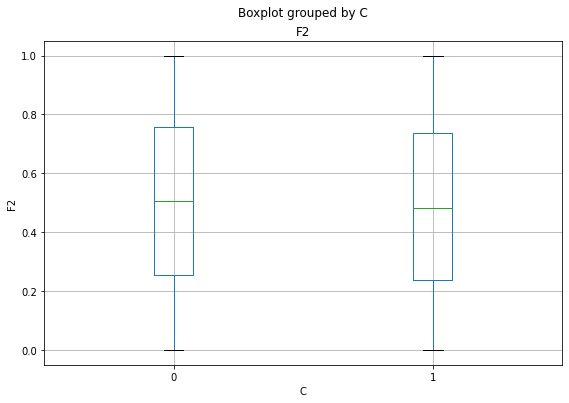

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


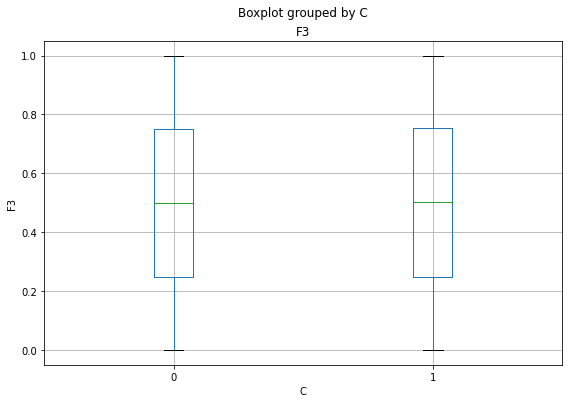

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


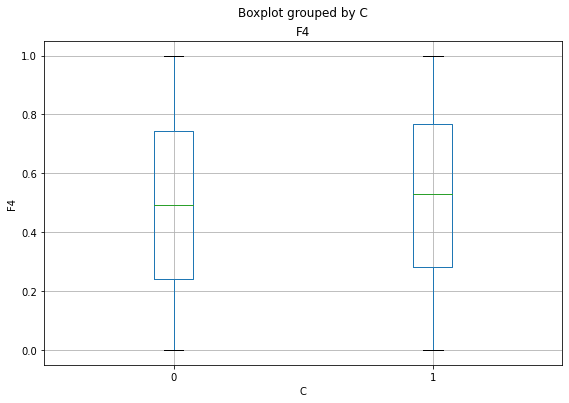

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


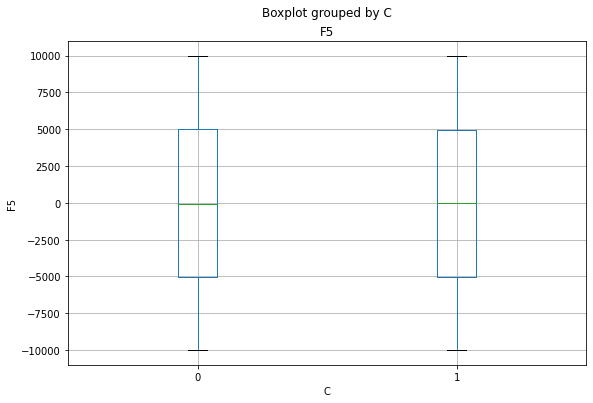

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


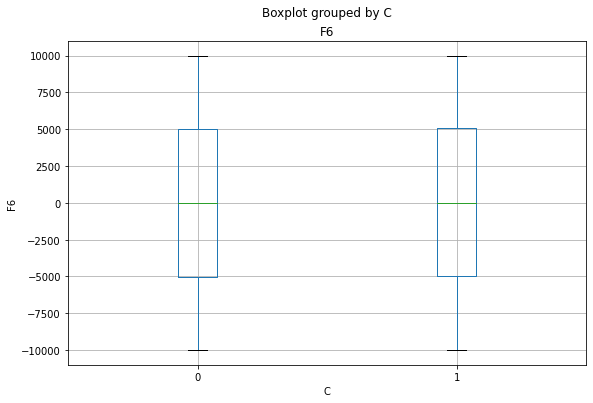

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


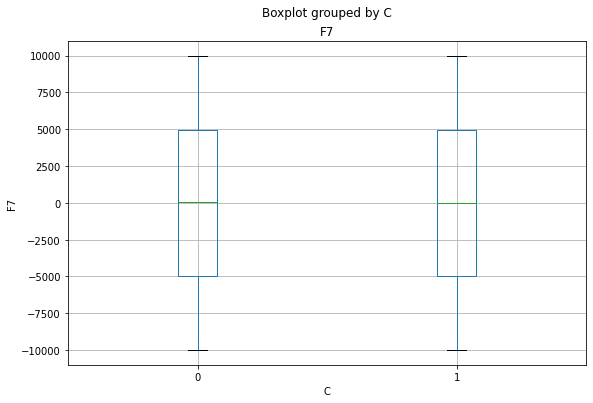

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


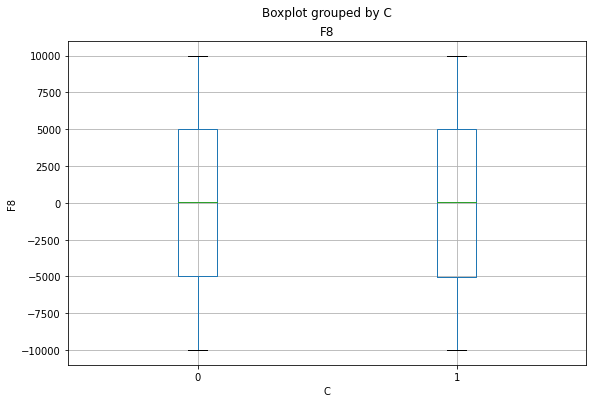

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


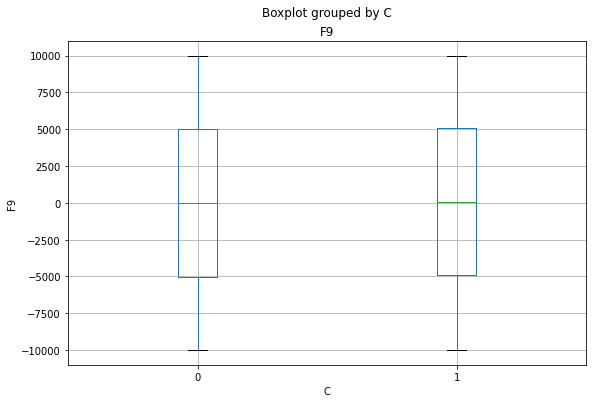

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


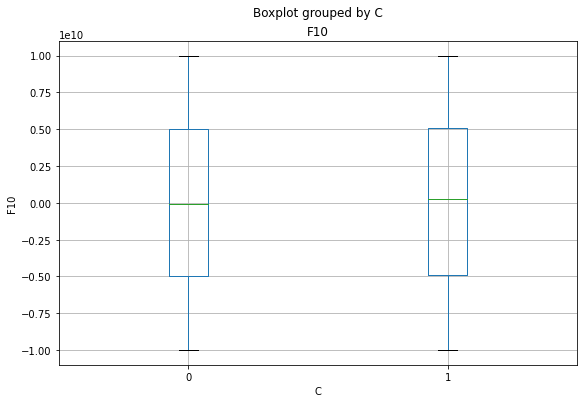

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


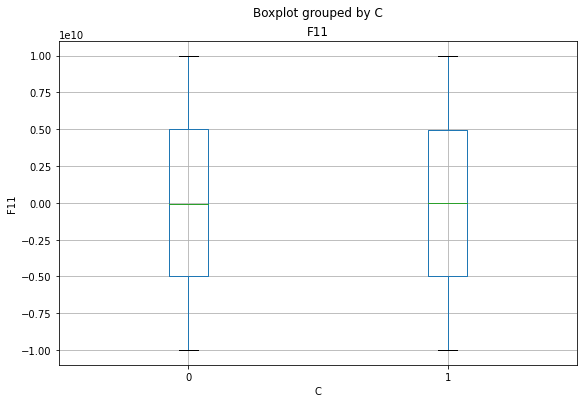

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


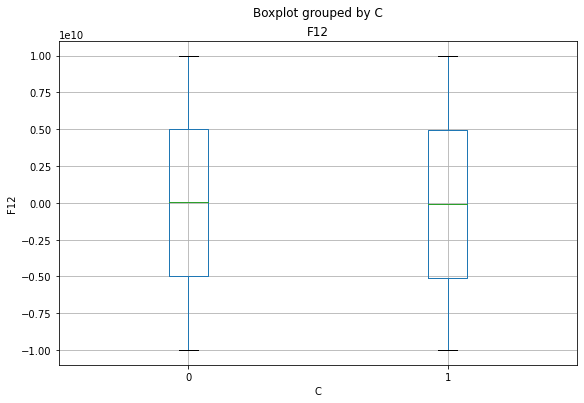

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


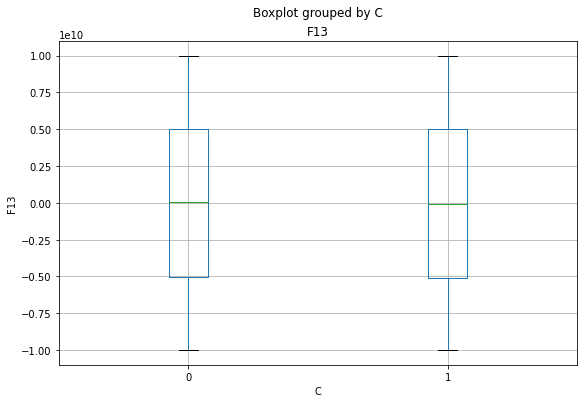

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


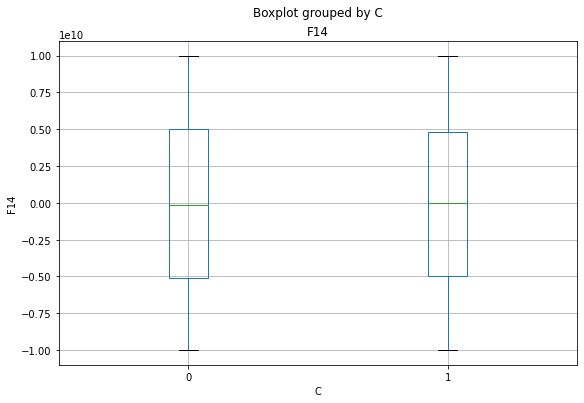

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


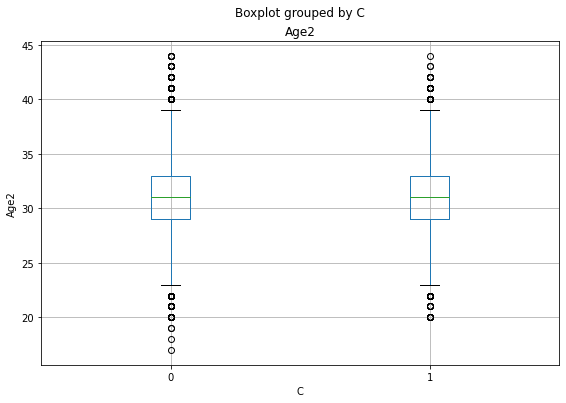

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


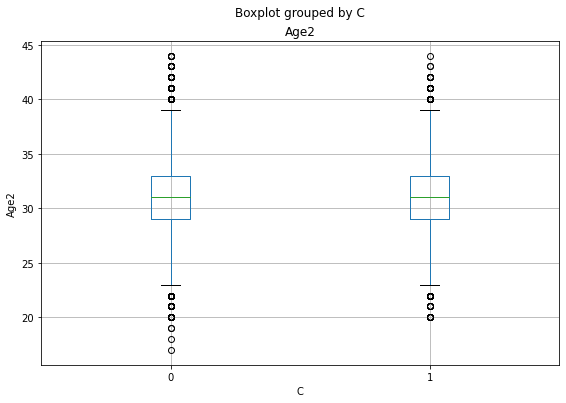

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


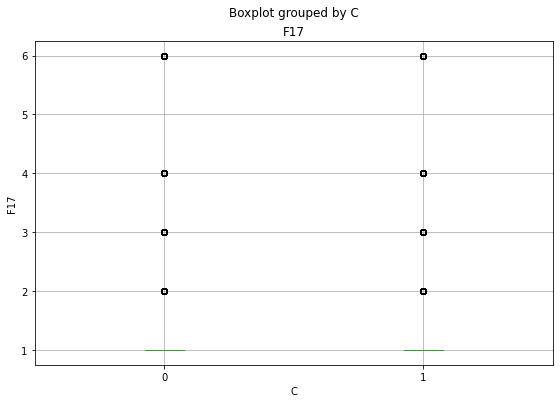

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


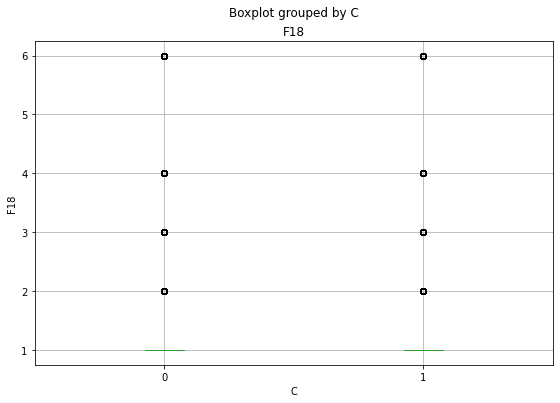

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


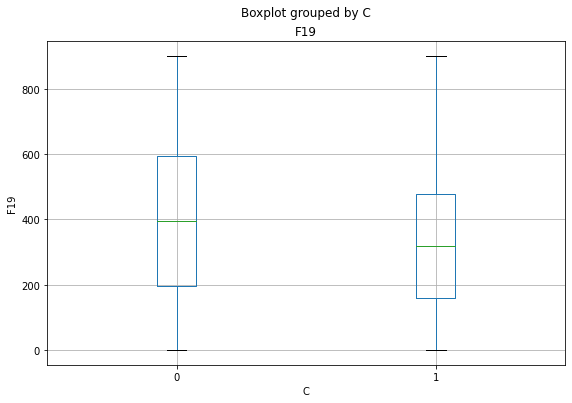

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


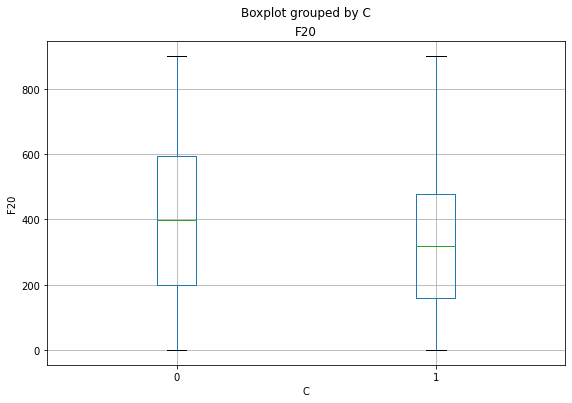

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


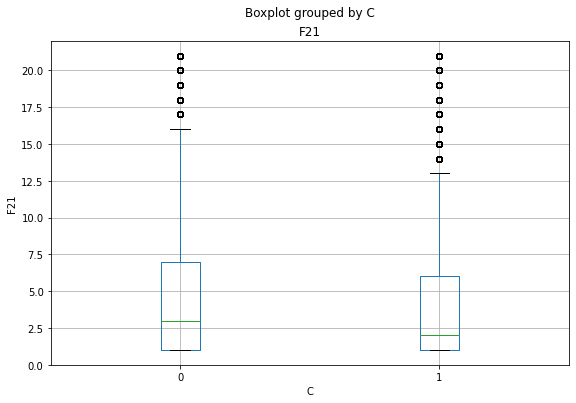

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


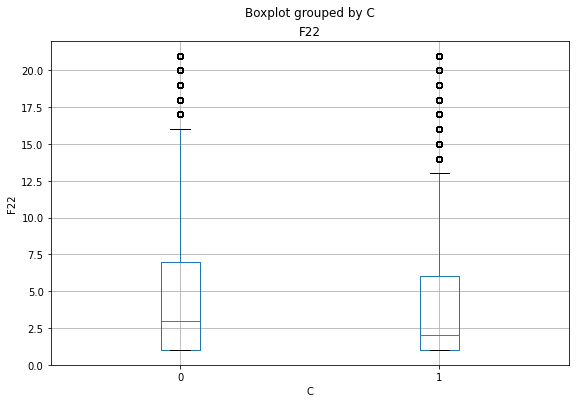

In [12]:
dep= ['C']
ind = ['F1',	'F2',	'F3',	'F4',	'F5',	'F6',	'F7',	'F8',	'F9','F10',	'F11', 'F12',	'F13',	'F14', 'Age2','Age2',	'F17',	'F18',	'F19' , 'F20','F21','F22']
for i in ind:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = i, by = 'C', ax = ax)
  ax.set_ylabel(i)
  plt.show()

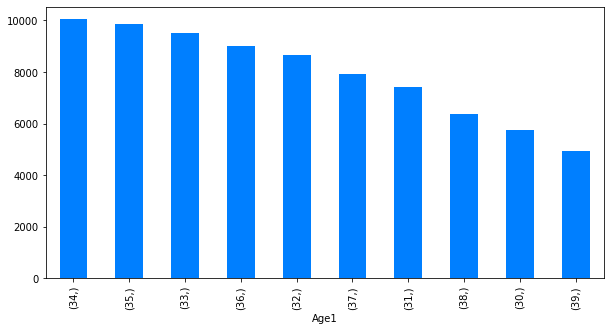

In [13]:
#using bar plot to get most frequent aircraft
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
df[['Age1']].value_counts()[0:10].plot(kind='bar',figsize=(10,5))

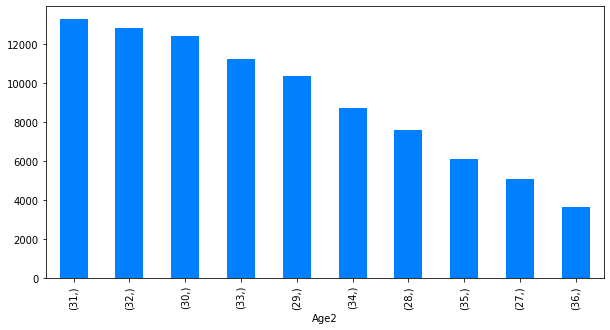

In [14]:
df[['Age2']].value_counts()[0:10].plot(kind='bar',figsize=(10,5))

In [15]:
features= df.columns
features

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'C',
       'Age1', 'Age2'],
      dtype='object')

In [16]:
features_1= features.drop(['C','F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14','F19', 'F20'])
features_1

Index(['F17', 'F18', 'F21', 'F22', 'Age1', 'Age2'], dtype='object')

F17


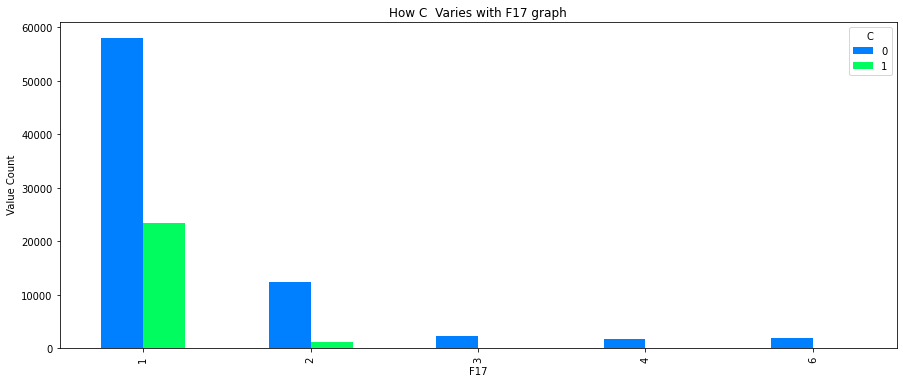

F18


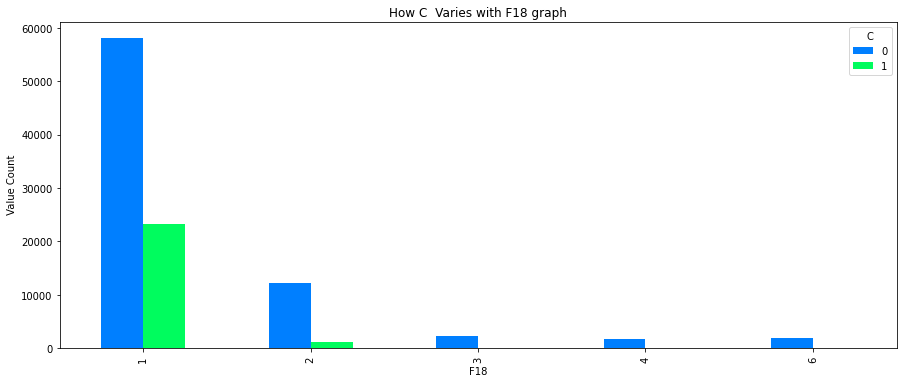

F21


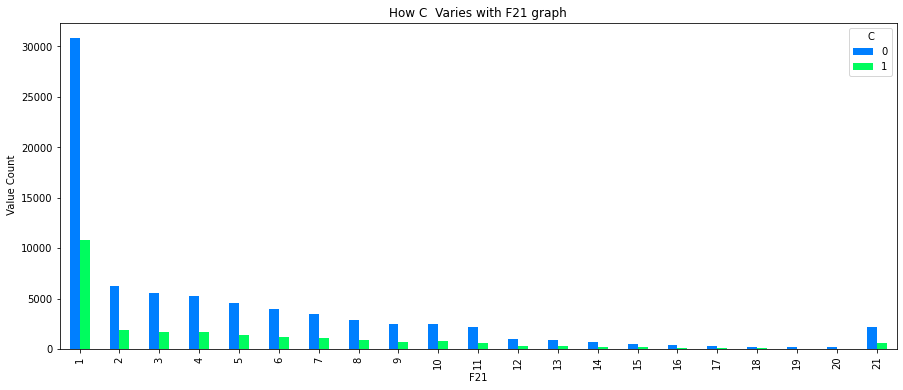

F22


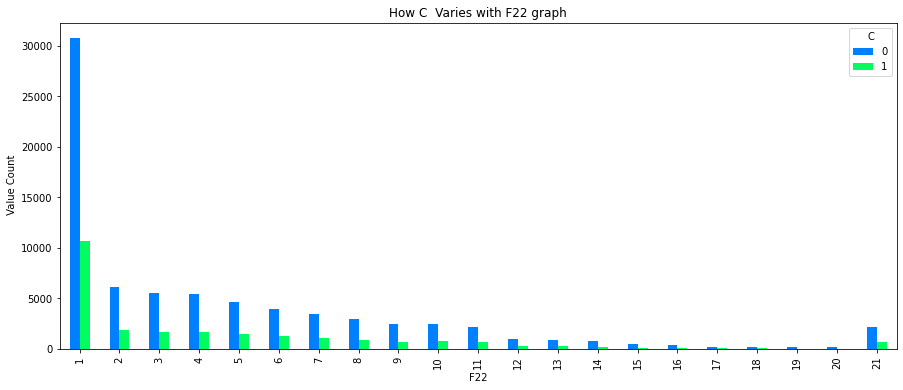

Age1


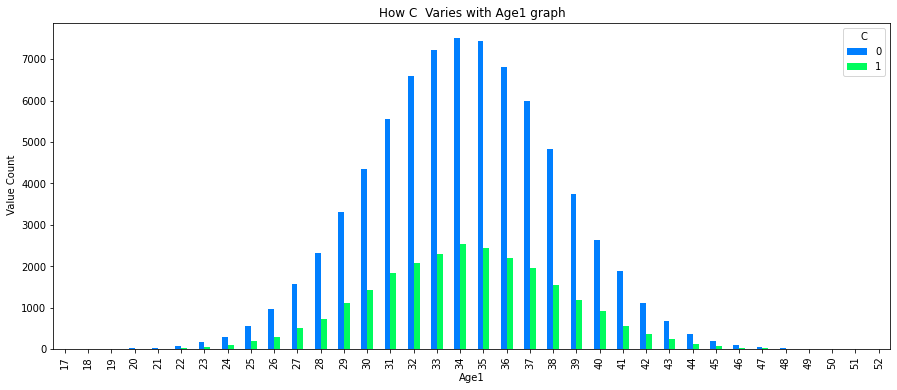

Age2


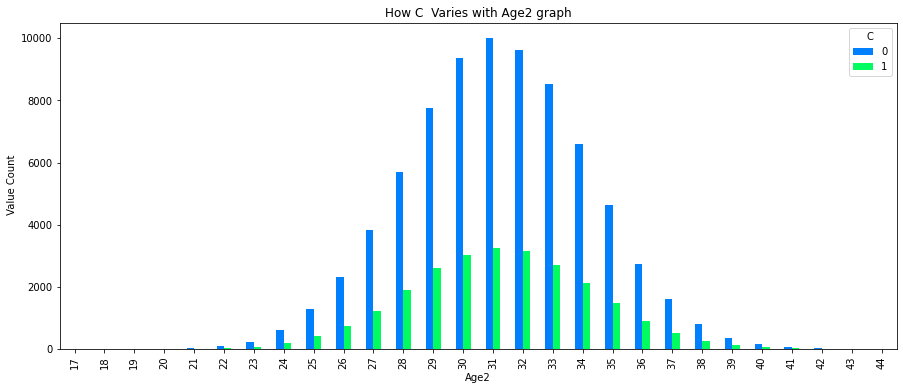

In [17]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  df.groupby([feature])['C'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How C  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

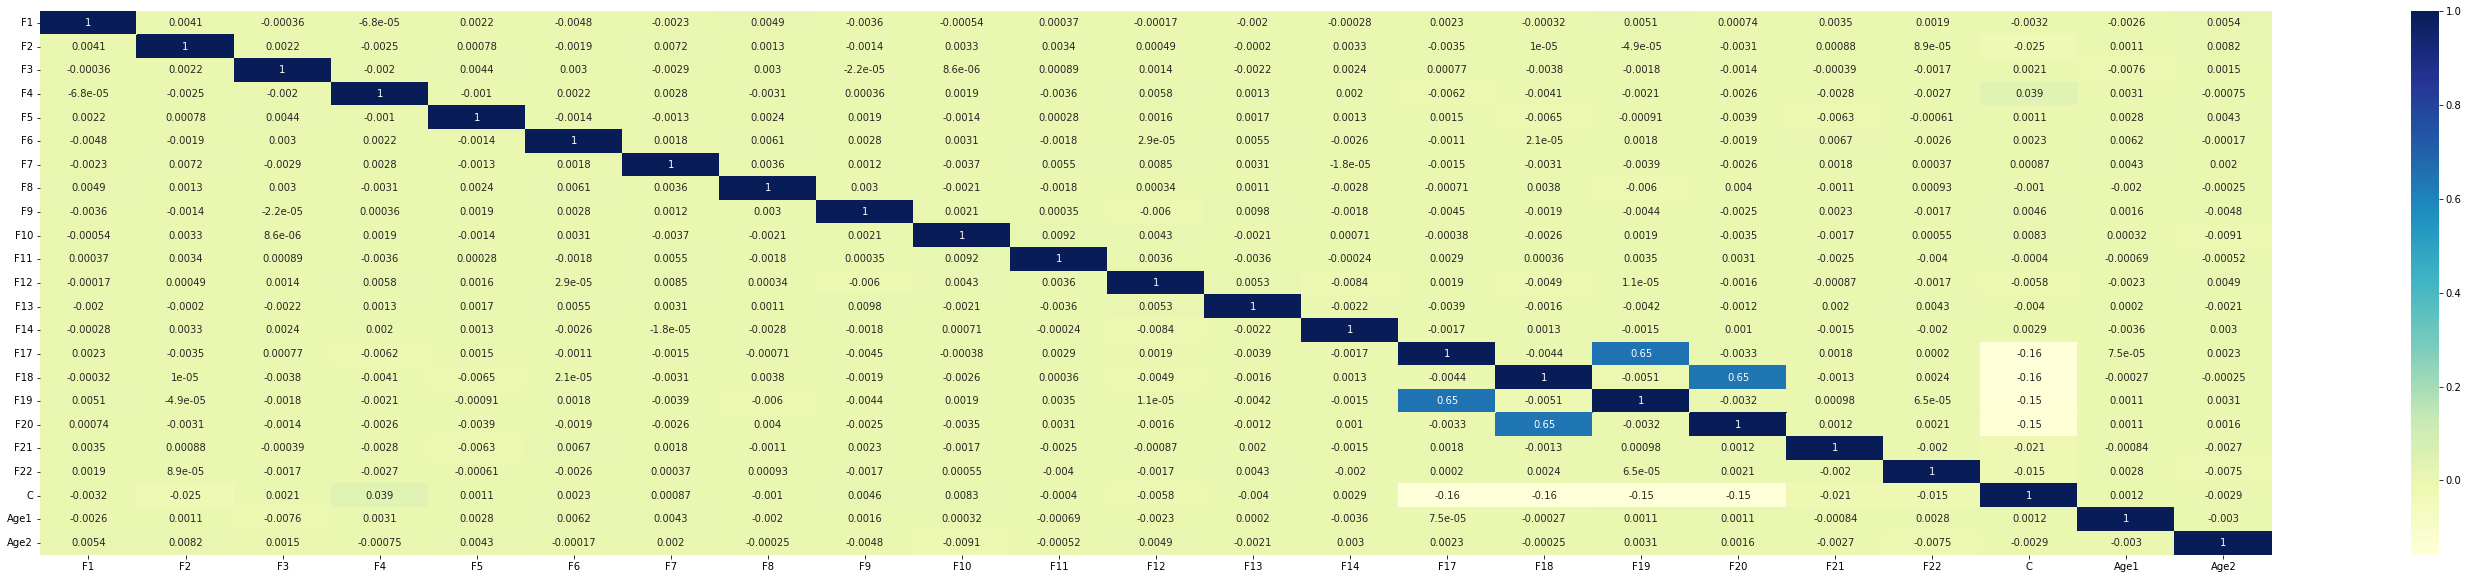

In [18]:
fig = plt.figure(figsize = (50,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [20]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Age1','Age2']]])

,variables,VIF
0,F1,3.505932
1,F2,3.458041
2,F3,3.459154
3,F4,3.483427
4,F5,1.000166
5,F6,1.000217
6,F7,1.000252
7,F8,1.000207
8,F9,1.000216
9,F10,1.000253


We Can see that the feature F17 seems to be highly correlated  with F19 and F18 is higly correlated with F20. So we can delete anyone one the both pairs. lets say F19 and F20 and lets check VIF including age factors

In [21]:
df = df.drop(['F19','F20'],axis = 1)


In [22]:
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,F1,0.985661
1,F2,0.986935
2,F3,0.984140
3,F4,0.987174
4,F5,1.000134
5,F6,1.000222
6,F7,1.000239
7,F8,1.000147
8,F9,1.000234
9,F10,1.000280


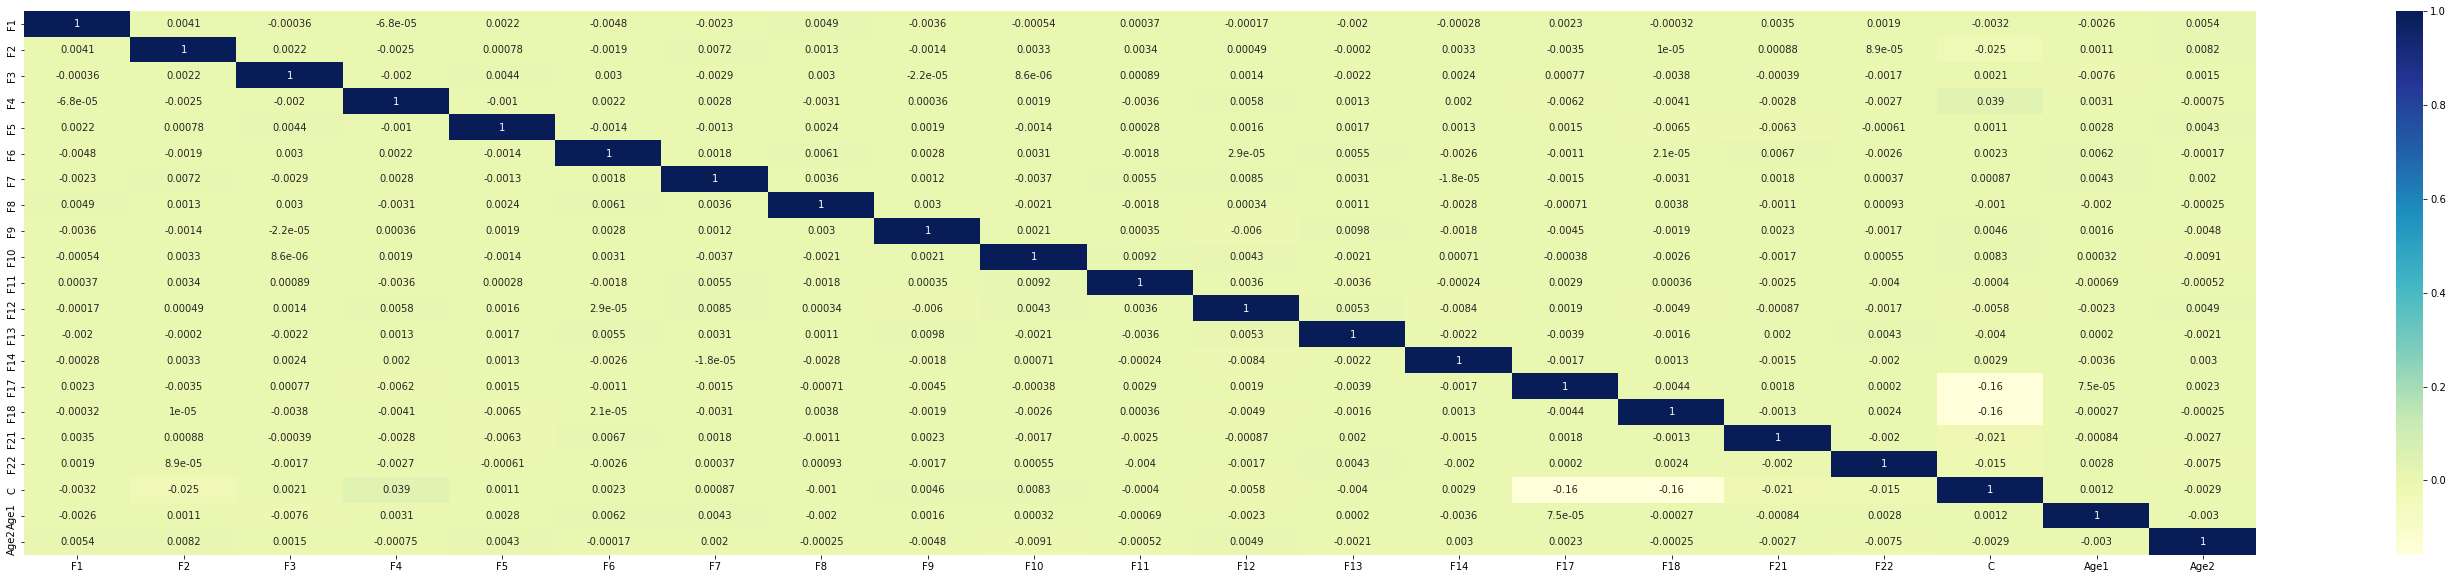

In [23]:
fig = plt.figure(figsize = (50,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

As the dataset contains values on different scales we must normalize the data first before feeding it to the model.

# **Splitting data into train and test**

In [26]:
# features will be saved as X and our target will be saved as y
# Specifying dependent variable
y = df['C'].copy()
# Specifying independent variable

X = df[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F17','F18','F21','F22']].copy()
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F21,F22
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,1,2
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,18,7
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,1,4
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,15,1
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101175,0.131724,0.146060,0.933111,0.576140,2708,-27,1584,-560,4712,1407261931,2200210722,3263130536,-6652948574,1240957077,2,1,6,1
101176,0.621812,0.873482,0.079753,0.197784,-4149,7634,-424,-5639,9960,6361808023,9614534079,-4110554578,-2729441740,1012332616,1,1,5,1
101177,0.909137,0.521869,0.233667,0.879493,-1920,-9858,-1086,615,-5154,5230015471,5031031479,7750015523,-1480708073,5703907465,1,1,2,4
101178,0.901495,0.546203,0.610663,0.805136,8372,4101,-2433,7065,-7695,176944084,-5186208321,-9324308921,5297524389,1988248591,1,1,1,1


In [27]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [32]:
# Get shapes for Train and Test set
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((80944, 18), (20236, 18), (80944,), (20236,))

In [42]:
#creating function for storing evaluation metrices
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df= metric_df.append({'Model': model,
                               'Accuracy':accuracy_score(y_test,pred_value),
                               'Recall':recall_score(y_test,pred_value),
                               'Precision':precision_score(y_test,pred_value),
                               'f1-score':f1_score(y_test,pred_value),
                               'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df

In [40]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df= pd.DataFrame(columns = column)


In [34]:
#logistic regression
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.49935758054951573


              precision    recall  f1-score   support

           0       0.75      0.50      0.60     15282
           1       0.24      0.50      0.33      4954

    accuracy                           0.50     20236
   macro avg       0.50      0.50      0.46     20236
weighted avg       0.63      0.50      0.53     20236


Accuracy score % of the model is 49.94%



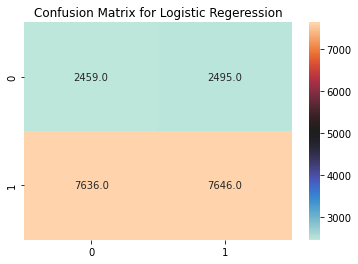

In [43]:
#model evaluation
pred_value = lr.predict(X_test)

print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt = ".1f",cmap='icefire')
plt.title('Confusion Matrix for Logistic Regeression')

#calling function to append evaluation metrices
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)